<a href="https://colab.research.google.com/github/Ssamikarann/US-population/blob/master/USPopulation_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## US population Dataset

This is a dataset from the U.S. Census Bureau hosted by the Federal Reserve Economic Database (FRED). FRED has a data platform found here and they update their information according the amount of data that is brought in. Explore the U.S. Census Bureau using Kaggle and all of the data sources available through the U.S. Census Bureau organization page!
https://www.kaggle.com/census/population-time-series-data


Evaluation is inspired by :

https://www.kaggle.com/gayatry/population-prediction-ar-vs-arima

and

https://machinelearningmastery.com/time-series-data-stationary-python/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

plt.style.use('ggplot')

 ## Reading and Exploring Dataset

In [ ]:
from google.colab import files

files.upload()

Saving POP.csv to POP.csv


{'POP.csv': b'realtime_start,value,date,realtime_end\n2019-12-06,156309,1952-01-01,2019-12-06\n2019-12-06,156527,1952-02-01,2019-12-06\n2019-12-06,156731,1952-03-01,2019-12-06\n2019-12-06,156943,1952-04-01,2019-12-06\n2019-12-06,157140,1952-05-01,2019-12-06\n2019-12-06,157343,1952-06-01,2019-12-06\n2019-12-06,157553,1952-07-01,2019-12-06\n2019-12-06,157798,1952-08-01,2019-12-06\n2019-12-06,158053,1952-09-01,2019-12-06\n2019-12-06,158306,1952-10-01,2019-12-06\n2019-12-06,158451,1952-11-01,2019-12-06\n2019-12-06,158757,1952-12-01,2019-12-06\n2019-12-06,158973,1953-01-01,2019-12-06\n2019-12-06,159170,1953-02-01,2019-12-06\n2019-12-06,159349,1953-03-01,2019-12-06\n2019-12-06,159556,1953-04-01,2019-12-06\n2019-12-06,159745,1953-05-01,2019-12-06\n2019-12-06,159956,1953-06-01,2019-12-06\n2019-12-06,160184,1953-07-01,2019-12-06\n2019-12-06,160449,1953-08-01,2019-12-06\n2019-12-06,160718,1953-09-01,2019-12-06\n2019-12-06,160978,1953-10-01,2019-12-06\n2019-12-06,161223,1953-11-01,2019-12-06\n201

In [ ]:
df = pd.read_csv('POP.csv')

In [ ]:
df = df.drop(columns=['realtime_start','realtime_end'])

In [ ]:
df['date'] = pd.to_datetime(df['date'])

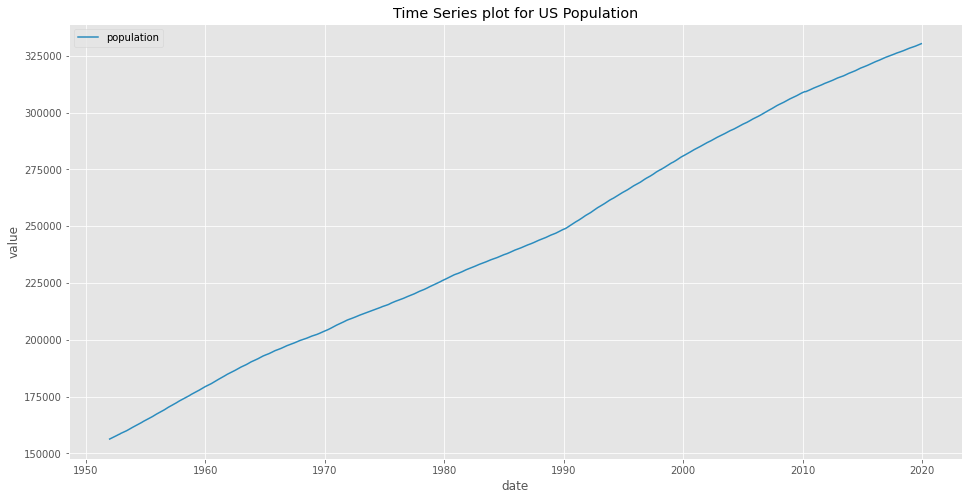

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x='date',y='value',data=df,label='population',color='#2b8cbe')
plt.title('Time Series plot for US Population')
plt.show()

#### checking if time-intervals are linear

In [ ]:
df_new= df.copy() 

df_new['Difference']=df_new['date'].diff()/np.timedelta64(1, 'D')
df_new.dropna(inplace=True)
df_new['Difference'] = df_new['Difference'].astype('int')
df_new['month'] = df_new['date'].dt.month.astype('int')
df_new['year'] = df_new['date'].dt.year.astype('int')


In [ ]:
df_new

,value,date,Difference,month,year
1,156527.000,1952-02-01,31,2,1952
2,156731.000,1952-03-01,29,3,1952
3,156943.000,1952-04-01,31,4,1952
4,157140.000,1952-05-01,30,5,1952
5,157343.000,1952-06-01,31,6,1952
...,...,...,...,...,...
811,329591.333,2019-08-01,31,8,2019
812,329785.872,2019-09-01,31,9,2019
813,329982.035,2019-10-01,30,10,2019
814,330154.949,2019-11-01,31,11,2019


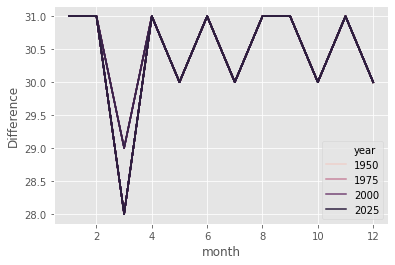

In [ ]:
sns.lineplot(x='month',y='Difference',hue='year',data=df_new)

In [ ]:
df_new = pd.pivot_table(index='year',columns='month',values='value',aggfunc='count',data=df_new)

In [ ]:
df_new = df_new.reset_index()

In [ ]:
np.where(~df_new.notnull())[0]

array([0])

Except for Array Zero no nulls  which is a good sign no missing time interval

#### AutoCorrelation
One common way for the "independence" condition in a multiple linear regression model to fail is when the sample data have been collected over time and the regression model fails to effectively capture any time trends. In such a circumstance, the random errors in the model are often positively correlated over time, so that each random error is more likely to be similar to the previous random error that it would be if the random errors were independent of one another. This phenomenon is known as autocorrelation (or serial correlation) and can sometimes be detected by plotting the model residuals versus time. 

The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF) For example the ACF for a time series yt is given by:

Corr(yt,yt−k),k=1,2,....
This value of k is the time gap being considered and is called the lag. A lag 1 autocorrelation (i.e., k = 1 in the above) is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart.

https://online.stat.psu.edu/stat462/node/188/

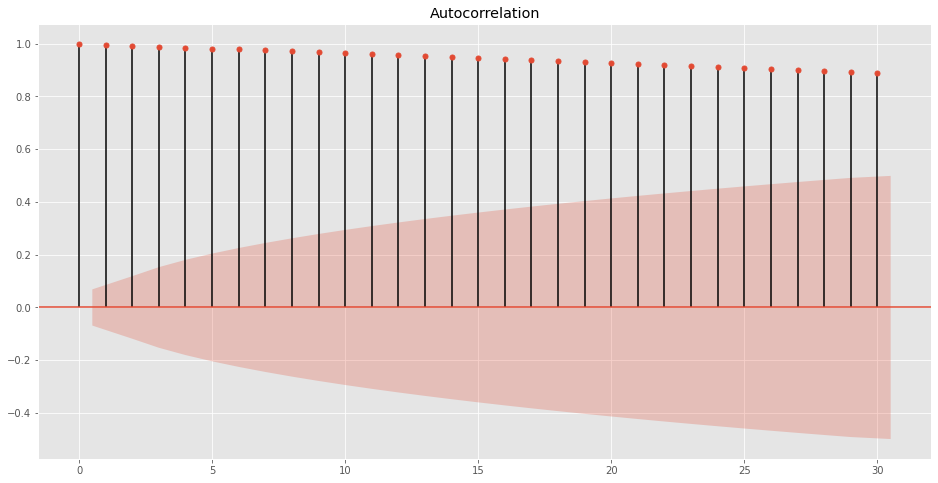

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,ax = plt.subplots(figsize=(16,8))
plot_acf(df['value'],ax=ax)
plt.show()

Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

— Page 81, Section 4.5.6 Partial Autocorrelations, Introductory Time Series with R.

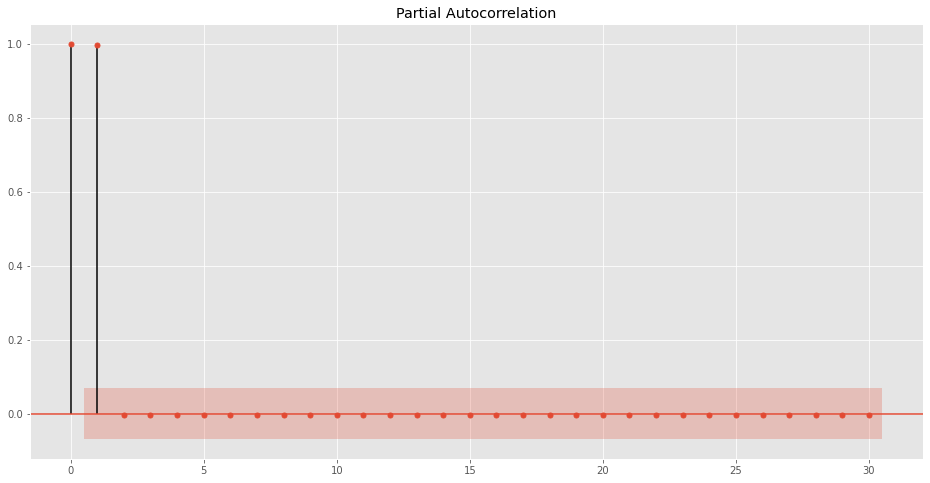

In [ ]:

fig,ax = plt.subplots(figsize=(16,8))
plot_pacf(df['value'],ax=ax)
plt.show()

The plot above gives a plot of the PACF (partial autocorrelation function), which can be interpreted to mean that a second-order autoregression may be warranted since there are notable partial autocorrelations for lags 1 and 2.

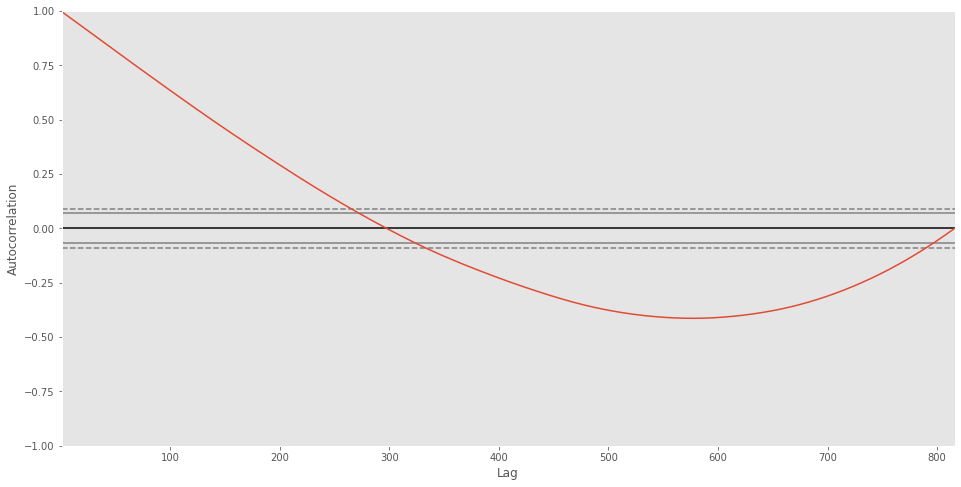

In [ ]:
plt.figure(figsize=(16,8))
pd.plotting.autocorrelation_plot(df['value'])

From the above plot , we can see that there is a positive correlation with the first 300 lags

In [ ]:
df['value'].autocorr(lag=1)

0.9999996224931105

### Checking for Seasonality

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df

,value,date
0,156309.000,1952-01-01
1,156527.000,1952-02-01
2,156731.000,1952-03-01
3,156943.000,1952-04-01
4,157140.000,1952-05-01
...,...,...
811,329591.333,2019-08-01
812,329785.872,2019-09-01
813,329982.035,2019-10-01
814,330154.949,2019-11-01


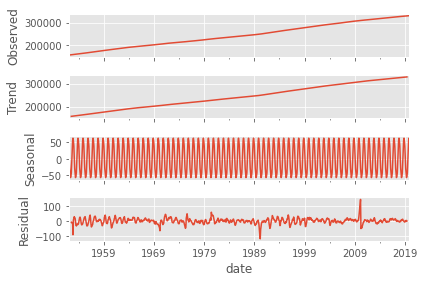

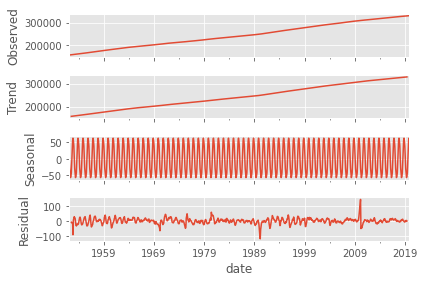

In [ ]:
df_decompose = seasonal_decompose(df.set_index('date')['value'])

df_decompose.plot()

##### ADF Test
Augmented Dickey-Fuller unit root test.

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

* **Null Hypothesis (H0)**: It suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* **Alternate Hypothesis (H1)** : It suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

* p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
level_of_significance = 0.05

adf_val = adfuller(df['value'])

level_of_significance,adf_val

(0.05,
 (-0.6653174110242713,
  0.8555297778919901,
  17,
  798,
  {'1%': -3.4385711275998583,
   '10%': -2.568702230639255,
   '5%': -2.8651686574447375},
  6593.486797606459))

In [ ]:
print(f'here p-value is {adf_val[1]}')


here p-value is 0.8555297778919901


## Fitting First ARIMA Model

### Autoregressive Integrated Moving Average Model
This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:





*   **AR**: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
*   **I**: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
*  **MA**: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.







The parameters of the ARIMA model are defined as follows:

* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average. 

### Finding difference term (d)

In [ ]:
df['difference1'] = df['value'].diff()
df['difference2'] = df['difference1'].diff()

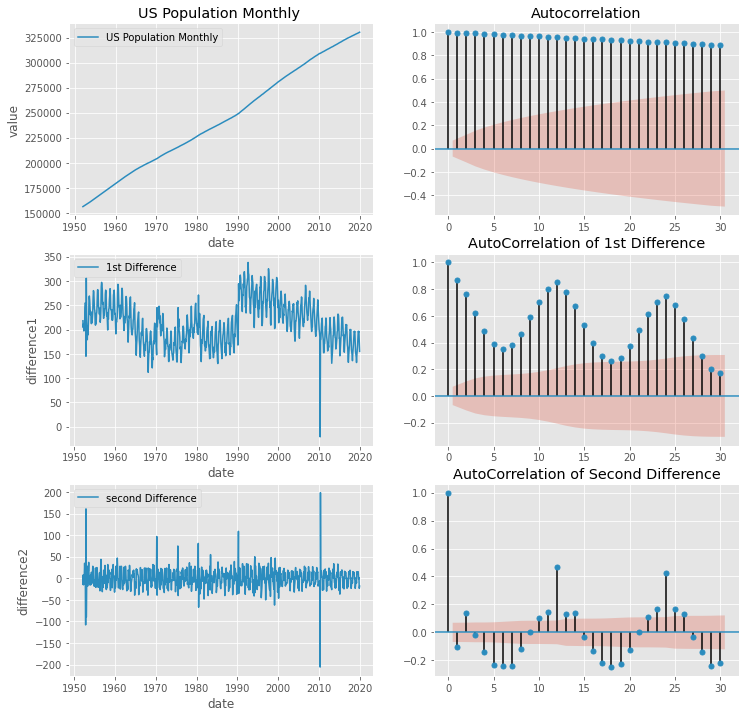

In [ ]:

fig, ax = plt.subplots(3,2,figsize=(12,12))

a = sns.lineplot(x='date',y='value',data=df,label='US Population Monthly',color='#2b8cbe',ax=ax[0,0])
ax[0,0].set_title('US Population Monthly ')
plot_acf(df['value'],ax= ax[0,1],color='#2b8cbe') # autocorrelation chart

b = sns.lineplot(x='date',y='difference1',data=df,label='1st Difference',color='#2b8cbe',ax=ax[1,0])
#ax[1,0].set_title('1st Difference ')
plot_acf(df['difference1'].dropna(),ax= ax[1,1],color='#2b8cbe',title='AutoCorrelation of 1st Difference') # autocorrelation chart

c = sns.lineplot(x='date',y='difference2',data=df,label='second Difference',color='#2b8cbe',ax=ax[2,0])
#ax[2,0].set_title('2nd  Difference ')
plot_acf(df['difference2'].dropna(),ax= ax[2,1],color='#2b8cbe',title='AutoCorrelation of Second Difference') # autocorrelation chart
plt.show()



The AutoCorrelation of Second Difference has negative values implying overdifferencing. So, d= 1 will be considered although d=2 makes the data more stationary

### Finding AR term(P)
The number of lag observations included in the model, also called the lag order.

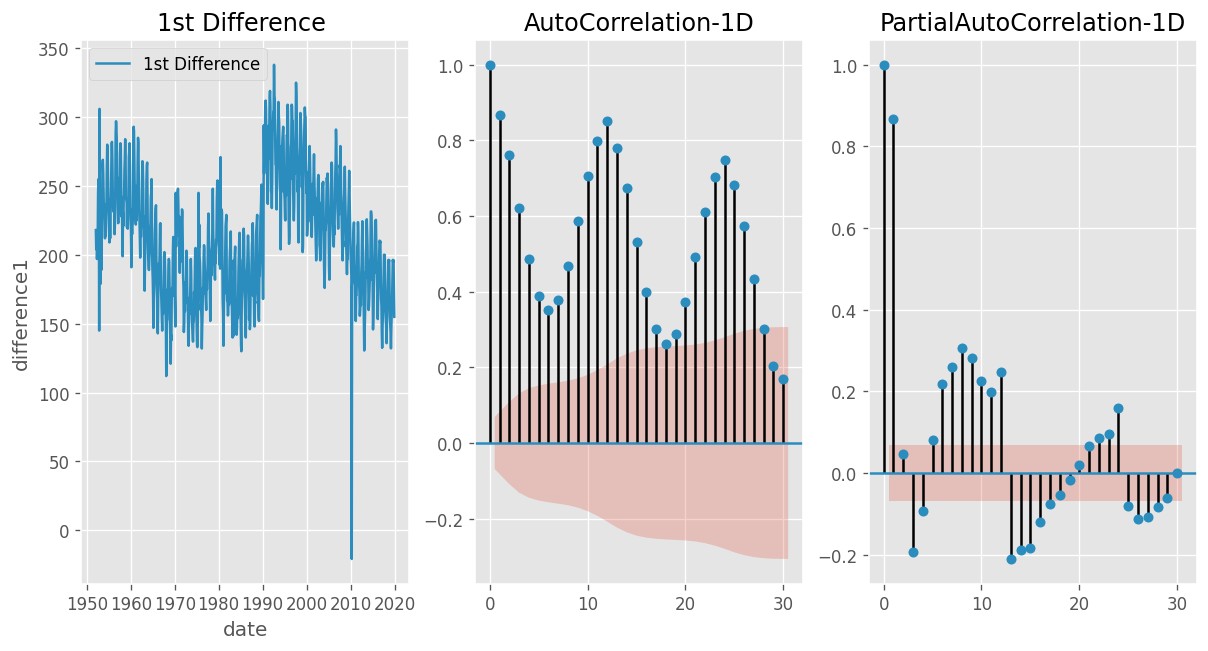

In [ ]:
# For 1st Difference :
# Partial Autocorrelation is :

fig,ax = plt.subplots(1,3,figsize=(12,6),dpi=120)
b = sns.lineplot(x='date',y='difference1',data=df,label='1st Difference',color='#2b8cbe',ax=ax[0])

ax[0].set_title('1st Difference ')
plot_acf(df['difference1'].dropna(),ax= ax[1],color='#2b8cbe',title='AutoCorrelation-1D') # autocorrelation chart
plot_pacf(df['difference1'].dropna(),ax= ax[2],color='#2b8cbe',title='PartialAutoCorrelation-1D') # Partial autocorrelation chart
plt.show()


The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.


Lag Difference of 1 is significantly higher, so P=1

### Finding MA term(q)
The size of the moving average window, also called the order of moving average.

From Above chart, q is chosen to be 2 

Because In the autocorrelation chart, everything is in the positive region

## Building Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#splitting dataset
df_train = df['value'][:700]
df_test = df['value'][700:]

In [ ]:
model = ARIMA(df_train,(1,1,2))
model_fit = model.fit(disp=-1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  699
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3133.453
Method:                       css-mle   S.D. of innovations             21.383
Date:                Fri, 25 Sep 2020   AIC                           6276.906
Time:                        04:45:45   BIC                           6299.654
Sample:                             1   HQIC                          6285.700
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           216.4194      6.377     33.939      0.000     203.921     228.917
ar.L1.D.value     0.8414      0.026     32.281      0.000       0.790       0.893
ma.L1.D.value     0.0102      0.045     

In [ ]:
forecast_arr,std_arr,conf_arr = model_fit.forecast(len(df_test))

In [ ]:
y_pred = pd.Series(forecast_arr,index=df_test.index)

In [ ]:
pd.DataFrame({'True':df_test,'Pred':y_pred})

,True,Pred
700,309369.053,309203.536257
701,309548.502,309196.369907
702,309745.698,309224.658235
703,309957.775,309282.779083
704,310176.466,309366.001819
...,...,...
811,329591.333,331816.106287
812,329785.872,332032.525709
813,329982.035,332248.945132
814,330154.949,332465.364554


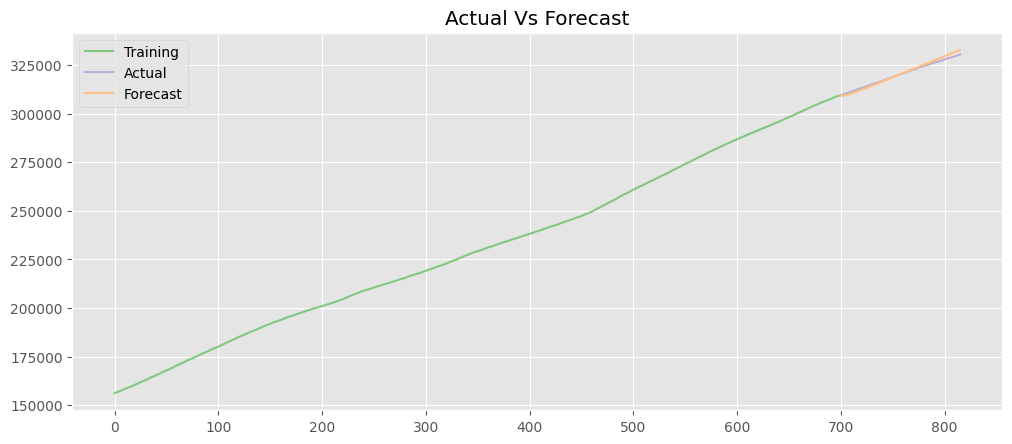

In [ ]:


plt.figure(figsize=(12,5), dpi=100)

plt.plot(df_train,label='Training',color ='#7fc97f')
plt.plot(df_test,label='Actual',color ='#beaed4' )
plt.plot(y_pred,label='Forecast',color='#fdc086')

#plt.fill_between(lower_series.index,lower_series,upper_series,color='k',alpha=.15)

plt.title('Actual Vs Forecast')
plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(df_test, y_pred)
print('Test MSE: %.3f' % error)

Test MSE: 1102895.017


### Using SARIMAX model

SARIMAX Model takes seasonality into account

In [ ]:

import statsmodels.api as sm

In [ ]:
modelsarimax = sm.tsa.statespace.SARIMAX(df_train,order=(2,1,3),seasonal_order=(2,1,3,12)).fit()



/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
resultsarimax = modelsarimax.predict(start = len(df_train), end = len(df_test)+len(df_train)-1,freq='MS',dynamic=True)

In [ ]:
resultsarimax

700    309302.399694
701    309439.884178
702    309597.834599
703    309766.123925
704    309950.610145
           ...      
811    325363.163068
812    325549.987715
813    325726.653955
814    325887.992188
815    326036.053174
Length: 116, dtype: float64

In [ ]:
pd.DataFrame({'True':df_test,'Pred':resultsarimax})

,True,Pred
700,309369.053,309302.399694
701,309548.502,309439.884178
702,309745.698,309597.834599
703,309957.775,309766.123925
704,310176.466,309950.610145
...,...,...
811,329591.333,325363.163068
812,329785.872,325549.987715
813,329982.035,325726.653955
814,330154.949,325887.992188


In [ ]:
y_pred = pd.Series(resultsarimax.values,index=df_test.index)

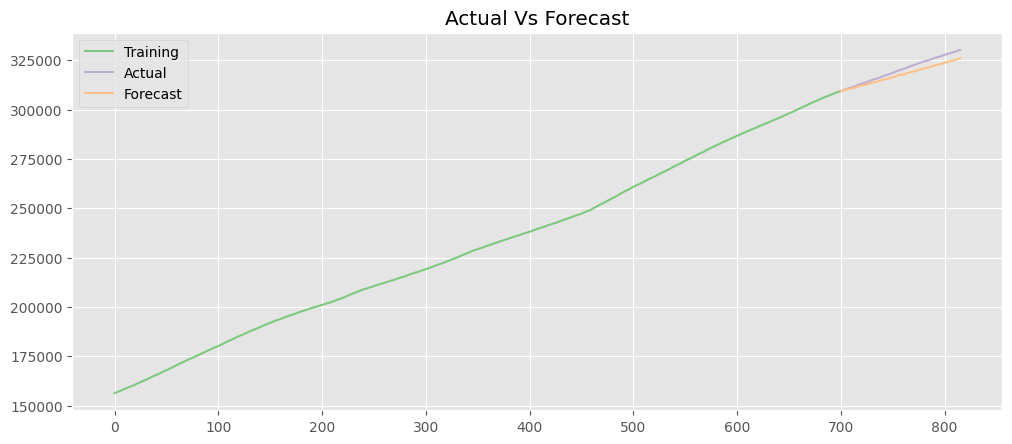

In [ ]:
plt.figure(figsize=(12,5), dpi=100)

plt.plot(df_train,label='Training',color ='#7fc97f')
plt.plot(df_test,label='Actual',color ='#beaed4' )
plt.plot(y_pred,label='Forecast',color='#fdc086')

#plt.fill_between(lower_series.index,lower_series,upper_series,color='k',alpha=.15)

plt.title('Actual Vs Forecast')
plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(df_test, y_pred)
print('Test MSE: %.3f' % error)

Test MSE: 7720788.896
